#Aldino Ogi - NIM I.211732

In [46]:
#2
#Masukan Library yang diperlukan termasuk dataset CIFAR-100
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import datasets, layers, models

In [68]:
#3
#Ambil dataset CIFAR-100 berdasarkan SuperClass yang dipilih dan terbagi menjadi data training dan testing beserta labelnya

(x_train, x_label), (y_test, y_label) = cifar100.load_data(label_mode='fine')

In [50]:
#4
#Sebutkan jumlah data gambar beserta ukurannya untuk data training dan testing
#nama superclass
indeks_insects = {
    "bee": 6,
    "beetle": 7,
    "butterfly": 14,
    "caterpillar": 18,
    "cockroach": 24
}

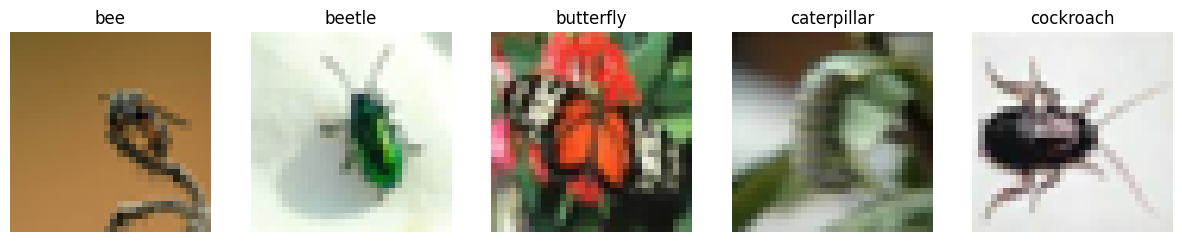

In [51]:
#5
#Tampilkan seluruh class/kelas dari SuperClass yang dipilih dengan sampel 1 gambar 1 kelas

plt.figure(figsize=(15,3))
for i, (nama_kelas,nama_indeks) in enumerate (indeks_insects.items()):
  indeks = np.where(x_label.flatten() == nama_indeks)[0][0]
  plt.subplot(1, len(indeks_insects), i + 1)
  plt.imshow(x_train[indeks])
  plt.title(nama_kelas)
  plt.axis("off")
plt.show()

In [66]:
#6
#Siapkan gambar training dan testing berdasarkan SuperClass yang dipilih

indeks2_insects = [6, 7, 14, 18, 24]

x_train_baru =[]
x_label_baru =[]

for i in indeks2_insects:
  indeks = np.where(x_label == i)[0]
  x_train_baru.append(x_train[indeks])
  x_label_baru.append(x_label[indeks])

x_train_baru = np.concatenate(x_train_baru) #tujuannya untuk menggabungkan dua atau lebih array
x_label_baru = np.concatenate(x_label_baru)

y_test_baru =[]
y_label_baru =[]

for i in indeks2_insects:
  indeks = np.where(y_label == i)[0]
  y_test_baru.append(y_test[indeks])
  y_label_baru.append(y_label[indeks])

y_test_baru = np.concatenate(y_test_baru) #tujuannya untuk menggabungkan dua atau lebih array
y_label_baru = np.concatenate(y_label_baru)

In [78]:
#7
#Normalisasikan data tersebut sebelum masuk ke proses training

x_train_baru = x_train.astype('float32')/ 255.0
y_test_baru = y_test.astype('float32')/ 255.0

In [79]:
#8
#Buat model CNN sebagai model pertama dengan layer yang diperlukan

model_cnn = models.Sequential() #Layers/lapisan dibuat 1 demi 1
model_cnn.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape= (32,32,3))) #mengolah data gambar dengan jumlah filter sebesar 32, setiap filter 3x3 piksel
model_cnn.add(layers.MaxPooling2D((2,2))) #mengurangi dimensi spasial dari gambar, (2,2) mengurangi ukuran gambar menjadi setengahnya
model_cnn.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model_cnn.add(layers.MaxPooling2D((2,2)))
model_cnn.add(layers.Flatten()) #mengubah peta fitur 2 dimensi menjadi 1 dimensi
model_cnn.add(layers.Dense(64,activation='relu')) # menambah lapisan menjadi 64 jaringan
model_cnn.add(layers.Dense(100)) #Mengubah lapisan menjadi 10 digit

In [87]:
#9
#Buat model RCNN sebagai model kedua dengan layer yang diperlukan

model_rcnn = Sequential([
    Conv2D(32,(3,3), padding ="same", activation='relu',input_shape=x_train.shape[1:]),
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3), padding ="same", activation='relu'),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(100,activation='softmax')
])

#10
#Jelaskan mengenai layer yang digunakan pada CNN dan RCNN

CNN:
1. Conv2D: Lapisan konvolusi dengan 32 filter dan kernel (3, 3), menggunakan aktivasi ReLU.
2. MaxPooling2D: Lapisan max pooling dengan ukuran pool (2, 2).
3. Flatten: Lapisan flatten untuk mengubah output 2D menjadi vektor 1D.
4. Dense: Lapisan fully connected dengan 64 neuron, menggunakan aktivasi ReLU.
5. Dense: Lapisan output dengan 100 neuron (asumsi 100 kelas pada CIFAR-100), menggunakan aktivasi softmax.

RCNN:
1. Reshape: Lapisan reshape untuk mengubah input menjadi bentuk (32, 32, 3).
2. Conv2D: Lapisan konvolusi dengan 32 filter dan kernel (3, 3), menggunakan aktivasi ReLU.
3. MaxPooling2D: Lapisan max pooling dengan ukuran pool (2, 2).
4. Flatten: Lapisan flatten untuk mengubah output 2D menjadi vektor 1D.
5. Dense: Lapisan fully connected dengan 64 neuron, menggunakan aktivasi ReLU.
6. Dense: Lapisan output dengan 100 neuron (asumsi 100 kelas pada CIFAR-100), menggunakan aktivasi softmax.

In [82]:
#11
#Lakukan compile dan fit pada model pertama dengan learning rate = 0,01, batch size = 256, epoch = 10, optimizer = Adam, dan loss function menggunakan Sparse Categorical Crossentropy

model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.fit(x_train_baru, x_label, epochs=10, batch_size=256)

Epoch 1/10
196/196 [==============================] - 55s 276ms/step - loss: 16.3247 - accuracy: 0.0100
Epoch 2/10
196/196 [==============================] - 59s 302ms/step - loss: 16.7332 - accuracy: 0.0100
Epoch 3/10
196/196 [==============================] - 54s 274ms/step - loss: 16.7332 - accuracy: 0.0100
Epoch 4/10
196/196 [==============================] - 59s 299ms/step - loss: 16.7332 - accuracy: 0.0100
Epoch 5/10
196/196 [==============================] - 56s 288ms/step - loss: 16.7332 - accuracy: 0.0100
Epoch 6/10
196/196 [==============================] - 61s 312ms/step - loss: 16.7332 - accuracy: 0.0100
Epoch 7/10
196/196 [==============================] - 52s 265ms/step - loss: 16.7332 - accuracy: 0.0100
Epoch 8/10
196/196 [==============================] - 53s 272ms/step - loss: 16.7332 - accuracy: 0.0100
Epoch 9/10
196/196 [==============================] - 51s 258ms/step - loss: 16.7332 - accuracy: 0.0100
Epoch 10/10
196/196 [==============================] - 49s 252ms

In [ ]:
#12
#Lakukan compile dan fit pada model kedua dengan learning rate = 0,01, batch size = 256, epoch = 10, optimizer = Adam, dan loss function menggunakan Sparse Categorical Crossentropy

model_rcnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_rcnn.fit(x_train_baru, x_label, epochs=10, batch_size=256)

Epoch 1/10
196/196 [==============================] - 210s 1s/step - loss: 4.6074 - accuracy: 0.0094
Epoch 2/10
196/196 [==============================] - 194s 991ms/step - loss: 4.6074 - accuracy: 0.0095
Epoch 3/10
196/196 [==============================] - 194s 986ms/step - loss: 4.6073 - accuracy: 0.0088
Epoch 4/10
196/196 [==============================] - 190s 971ms/step - loss: 4.6075 - accuracy: 0.0094
Epoch 5/10
196/196 [==============================] - 194s 989ms/step - loss: 4.6074 - accuracy: 0.0085
Epoch 6/10
181/196 [==========================>...] - ETA: 16s - loss: 4.6073 - accuracy: 0.0093

In [ ]:
#13
#Simpan kedua model tersebut dan muat kembali

model_cnn.save('model_cnn.h5')
model_rcnn.save('model_rcnn.h5')

loaded_model_cnn = tf.keras.models.load_model('model_cnn.h5')
loaded_model_rcnn = tf.keras.models.load_model('model_rcnn.h5')

In [ ]:
#14
#Berikan Plot accuracy berdasarkan model pertama

plt.plot(model_cnn.history.history['accuracy'], label='CNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#15
#Berikan Plot accuracy berdasarkan model kedua

plt.plot(model_rcnn.history.history['accuracy'], label='RCNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#16
#Kesimpulan Perbandingan Model Pertama dan Model Kedua

Kesimpulan dari hasil plot accuracy pada data CNN Memiliki akurasi yang lebih baik dibandingkan dengan RCNN, CNN mempunyai akurasi yang tetap